In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Directorio actual:", os.getcwd())
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# No truncar el DataFrame por ancho de pantalla
pd.set_option('display.width', 1000)

# No truncar las filas
pd.set_option('display.max_rows', None)

# No expandir el DataFrame en forma de bloques
pd.set_option('display.expand_frame_repr', False)

'''Feature Description:
work_year: El año en que se recogieron los datos (2024).
experience_level: El nivel de experiencia del empleado, categorizado como 'EX' (INGENIERO EXPERTO), 'SE' (ingeniero sénior), 'MI' (ingeniero de nivel medio) o 'EN' (ingeniero de nivel inicial).
employment_type: El tipo de empleo, como tiempo completo (FT), tiempo parcial (PT), contrato (C) o autónomo (F).
job_title: El título o función del empleado dentro de la empresa, por ejemplo, ingeniero de inteligencia artificial.
salary: El salario del empleado en la moneda local (por ejemplo, 202 730 USD).
salary_currency: La moneda en la que está denominado el salario (por ejemplo, USD).
salary_in_usd:El salario convertido a dólares estadounidenses para fines de estandarización.
employee_residence: El país de residencia del empleado.
remote_ratio: La proporción que indica el alcance del trabajo remoto permitido en el puesto (0 para ningún trabajo remoto, 1 para completamente remoto).
company_location: La ubicación de la empresa donde trabaja el empleado.
company_size:El tamaño de la empresa, a menudo categorizado por el número de empleados (S para pequeña, M para mediana, L para grande).'''

url='https://raw.githubusercontent.com/juanalejandr/Proyecto_final/2005fdbd5e5242190e7291e6e7975a8ea84f4122/Proyecto_final_coder/salaries_data.csv'
df=pd.read_csv(url,sep=',')
df['ID']=range(1,len(df)+1)
df.set_index('ID', inplace=True)
print(df.head(5))
print("\n"*2)

# Chequeo de datos nulos
miss_df= df.isnull().sum()
print(miss_df)
print("\n"*2)

# Chequeo de salarios "0"
miss_0_df= (df[['salary_in_usd']]==0).sum()
print(miss_0_df)
print("\n"*2)

#Chequeo de tipos de datos
df.info()
print("\n")
convert_category= ['salary_currency','experience_level','employment_type','employee_residence','remote_ratio','company_location','company_size']
df[convert_category]=df[convert_category].astype('category')
df.info()

#Ordenar data agrupando por job_title similares
job_titles = df['job_title'].value_counts()
print(job_titles)
remplazar=['Data Science Manager','Data Science','Data Science Consultant','Principal Data Scientist','Lead Data Scientist','Head of Data Science ','Applied Data Scientist','Data Science Engineer','Director of Data Science']
df['job_title'] = df['job_title'].replace(remplazar, 'Data Scientist') # Data Scientist
remplazar1=['Data Analytics Manager','BI Data Analyst','Data Analytics Lead','BI Analyst','Data Analytics Manager','Business Data Analyst']
df['job_title'] = df['job_title'].replace(remplazar1, 'Data Analyst') # Data Analyst
remplazar2=['Machine Learning Scientist','Machine Learning Developer','Applied Machine Learning Scientist','Machine Learning Software Engineer','Machine Learning Researcher','Machine Learning Infrastructure Engineer','ML Engineer']
df['job_title'] = df['job_title'].replace(remplazar2, 'Machine Learning Engineer') # Machine Learning Engineer




Directorio actual: c:\Users\juana\OneDrive\Documentos
    work_year experience_level employment_type                  job_title  salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
ID                                                                                                                                                                             
1        2024               SE              FT                AI Engineer  202730             USD         202730                 US             0               US            M
2        2024               SE              FT                AI Engineer   92118             USD          92118                 US             0               US            M
3        2024               SE              FT              Data Engineer  130500             USD         130500                 US             0               US            M
4        2024               SE              FT              Data E

In [67]:
#Agrupar datos para crear grafico de hipotesis 1: La experiencia influye en los salarios
info_data=['Data Scientist','Data Analyst','Machine Learning Engineer','Data Engineer']
df_data=df[df['job_title'].isin(info_data)].copy() #filtrando tipos de trabajo 'Data Scientist','Data Analyst','Machine Learning Engineer','Data Engineer'
df_data.reset_index(drop=True, inplace=True)
miss_null_df= (df_data[['job_title']].isnull()).sum() # verificando existencia de datos nulos
print(miss_null_df)
print(df_data['job_title'].unique())
df_data['job_title'] = df_data['job_title'].astype('category')
print("\n"*2)

#Promediar salarios por experiencia laboral y job_title
promedio_salarios_exp= df_data.groupby(['experience_level','job_title'], observed=False)['salary_in_usd'].mean().reset_index()
print(promedio_salarios_exp)
print("\n"*2)

#agrupar promedios de distintos tipos de job_title
df_analys=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Analyst'].reset_index(drop=True) # Data Analyst
df_ml=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Machine Learning Engineer'].reset_index(drop=True) # Machine Learning Engineer
df_engy=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Engineer'].reset_index(drop=True) # Data Engineer
df_scien=promedio_salarios_exp[promedio_salarios_exp['job_title']=='Data Scientist'].reset_index(drop=True) # Data Scientist
print(df_analys)



job_title    0
dtype: int64
['Data Engineer' 'Machine Learning Engineer' 'Data Analyst'
 'Data Scientist']



   experience_level                  job_title  salary_in_usd
0                EN               Data Analyst   84316.939286
1                EN              Data Engineer   94049.022901
2                EN             Data Scientist   85960.031414
3                EN  Machine Learning Engineer  104691.328571
4                EX               Data Analyst  116546.296296
5                EX              Data Engineer  194541.606452
6                EX             Data Scientist  206958.984375
7                EX  Machine Learning Engineer  226009.615385
8                MI               Data Analyst   99516.296353
9                MI              Data Engineer  120492.150502
10               MI             Data Scientist  127979.018868
11               MI  Machine Learning Engineer  162607.037940
12               SE               Data Analyst  123432.874633
13               SE   

Text(0.02, 0.5, 'Salarios en USDT')

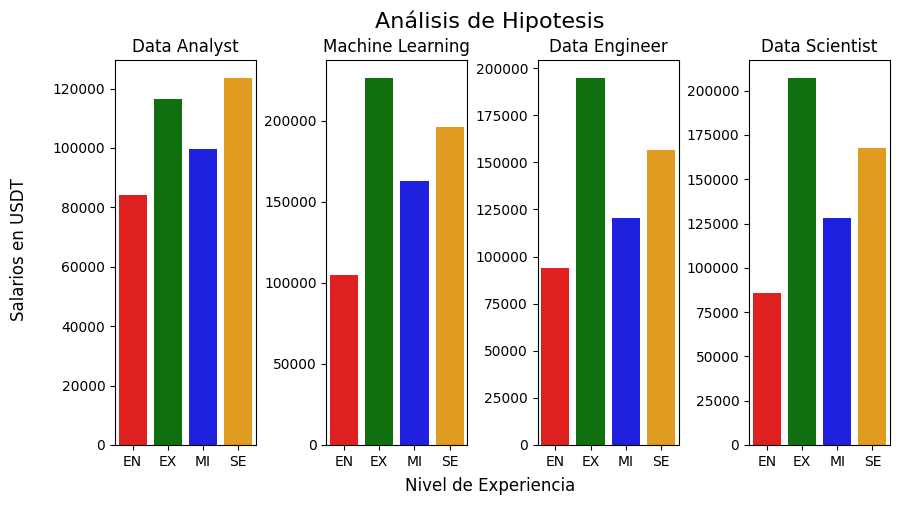

In [68]:
#Graficar Hipotesis 1
fig,axs=plt.subplots(1,4,figsize=(10,5))
p_paleta = ['red','green','blue','orange']

# Data Analyst
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_analys, palette=p_paleta, legend=False,ax=axs[0])
axs[0].set_title('Data Analyst')
axs[0].set_xlabel(' ')
axs[0].set_ylabel(' ')

# Machine Learning
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_ml, palette=p_paleta, legend=False,ax=axs[1])
axs[1].set_title('Machine Learning')
axs[1].set_xlabel(' ')
axs[1].set_ylabel(' ')

# Data Engineer
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_engy, palette=p_paleta, legend=False,ax=axs[2])
axs[2].set_title('Data Engineer')
axs[2].set_xlabel(' ')
axs[2].set_ylabel(' ')

# Data Scientist
sns.barplot(x='experience_level', y='salary_in_usd',hue='experience_level', data=df_scien, palette=p_paleta, legend=False,ax=axs[3])
axs[3].set_title( )
axs[3].set_xlabel(' ')
axs[3].set_ylabel(' ')
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Análisis de Hipotesis', fontsize=16)
fig.supxlabel('Nivel de Experiencia')
fig.supylabel('Salarios en USDT')


C:\Users\juana\AppData\Local\Temp\ipykernel_2116\2922485033.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_data['experience_level']=df_data['experience_level'].replace(map_dict)


int32
experience_level
3    7929
2    2878
1     952
4     336
Name: count, dtype: int64











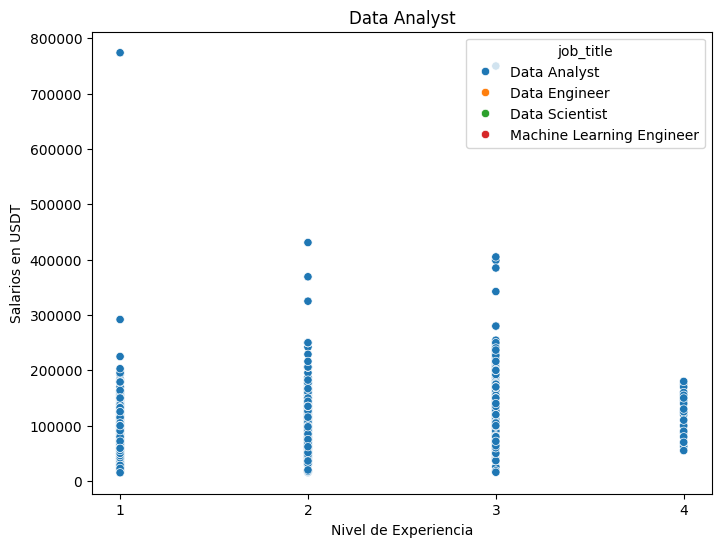

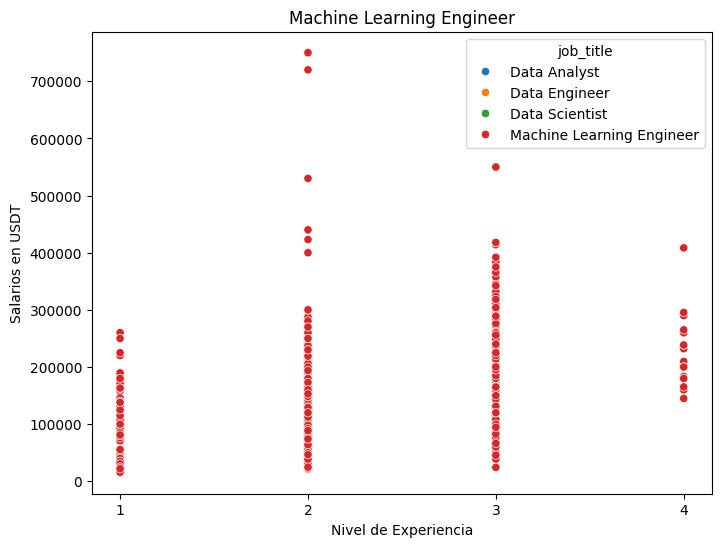

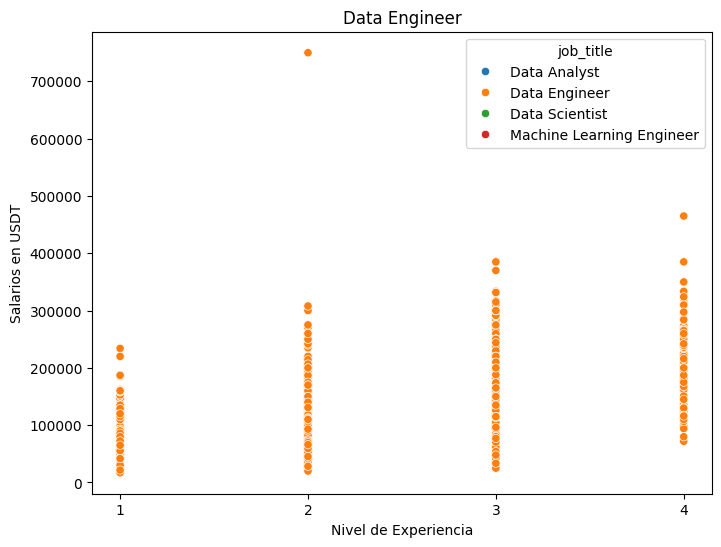

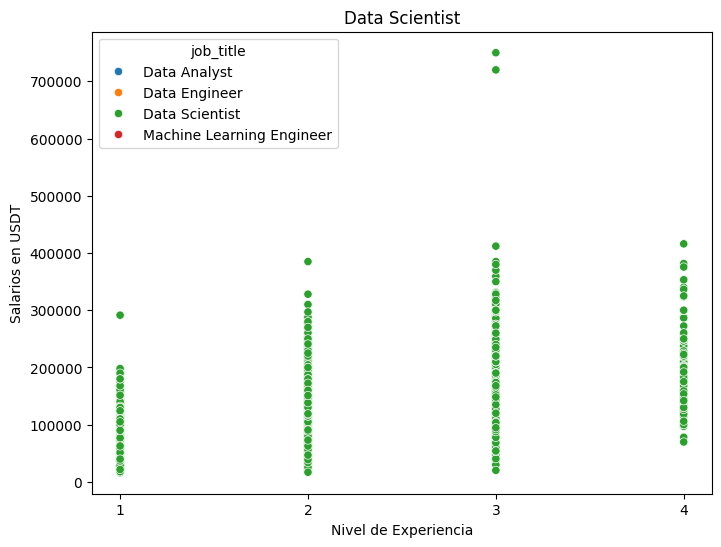

In [51]:
#Detectando patrones de distintos tipos de job_title por scatter
remplazar3=['EN','EX','MI','SE'] #reemplazando valores categoricos 'object' por int
sustituto=['1','4','2','3']      # donde 'EN'(junior)=1 / 'MI'(midlevel)=2 / 'SE'(senior)=3 / 'EX'(experto)=4
map_dict = dict(zip(remplazar3, sustituto))
df_data['experience_level']=df_data['experience_level'].replace(map_dict)
df_data['experience_level']=df_data['experience_level'].astype(int)
print(df_data['experience_level'].dtype)
print(df_data['experience_level'].value_counts())

# Data Analyst
fig, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(y=df_data[df_data['job_title']=='Data Analyst']['salary_in_usd'],x=df_data[df_data['job_title']=='Data Analyst']['experience_level'],hue='job_title' ,data=df_data)
ax.set_title('Data Analyst')
ax.set_xlabel('Nivel de Experiencia')
ax.set_ylabel('Salarios en USDT')
ax.set_xticks(range(df_data['experience_level'].min(), df_data['experience_level'].max() + 1))
print("\n"*2)

# Machine Learning
fig, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(y=df_data[df_data['job_title']=='Machine Learning Engineer']['salary_in_usd'],x=df_data[df_data['job_title']=='Machine Learning Engineer']['experience_level'],hue='job_title' ,data=df_data)
ax.set_title('Machine Learning Engineer')
ax.set_xlabel('Nivel de Experiencia')
ax.set_ylabel('Salarios en USDT')
ax.set_xticks(range(df_data['experience_level'].min(), df_data['experience_level'].max() + 1))
print("\n"*2)

# Data Engineer
fig, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(y=df_data[df_data['job_title']=='Data Engineer']['salary_in_usd'],x=df_data[df_data['job_title']=='Data Engineer']['experience_level'],hue='job_title' ,data=df_data)
ax.set_title('Data Engineer')
ax.set_xlabel('Nivel de Experiencia')
ax.set_ylabel('Salarios en USDT')
ax.set_xticks(range(df_data['experience_level'].min(), df_data['experience_level'].max() + 1))
print("\n"*2)

# Data Scientist
fig, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(y=df_data[df_data['job_title']=='Data Scientist']['salary_in_usd'],x=df_data[df_data['job_title']=='Data Scientist']['experience_level'],hue='job_title' ,data=df_data)
ax.set_title('Data Scientist')
ax.set_xlabel('Nivel de Experiencia')
ax.set_ylabel('Salarios en USDT')
ax.set_xticks(range(df_data['experience_level'].min(), df_data['experience_level'].max() + 1))


In [52]:
# eliminar casos outlier

# Identificar las filas que queremos eliminar 'Data Analyst'
outliers_da = df_data[(df_data['job_title'] == 'Data Analyst') & (df_data['salary_in_usd'] > 300000)]
print(outliers_da)
# Eliminar esas filas del DataFrame original
df_data = df_data.drop(outliers_da.index)

#Mostrar los datos después de la eliminación
'''print("\nDatos después de la eliminación de outliers:")
print(df_data)

#p=df_data[(df_data['job_title']=='Data Analyst') & (df_data['salary_in_usd']>300000)]
#print(p.count())
'''

# Identificar las filas que queremos eliminarque exedan un rango mayor a 410000 usdt 'Machine Learning Engineer'
outliers_ml = df_data[(df_data['job_title'] == 'Machine Learning Engineer') & (df_data['salary_in_usd'] > 410000)]
print(outliers_ml)
# Eliminar esas filas del DataFrame original
df_data = df_data.drop(outliers_ml.index)

# Identificar las filas que queremos eliminar que exedan un rango mayor a 600000 usdt 'Data Engineer'
outliers_de = df_data[(df_data['job_title'] == 'Data Engineer') & (df_data['salary_in_usd'] > 600000)]
print(outliers_de)
# Eliminar esas filas del DataFrame original
df_data = df_data.drop(outliers_de.index)

# Identificar las filas que queremos eliminar que exedan un rango mayor a 600000 usdt 'Data Scientist'
outliers_ds = df_data[(df_data['job_title'] == 'Data Scientist') & (df_data['salary_in_usd'] > 600000)]
print(outliers_ds)
# Eliminar esas filas del DataFrame original
df_data = df_data.drop(outliers_ds.index)


       work_year  experience_level employment_type     job_title  salary salary_currency  salary_in_usd employee_residence remote_ratio company_location company_size
2479        2024                 1              FT  Data Analyst  774000             USD         774000                 MX            0               MX            M
2830        2024                 3              FT  Data Analyst  398900             USD         398900                 US            0               US            M
2920        2024                 3              FT  Data Analyst  342400             USD         342400                 US            0               US            M
2926        2024                 3              FT  Data Analyst  398900             USD         398900                 US            0               US            M
2948        2024                 2              FT  Data Analyst  325000             USD         325000                 US            0               US            M
3452

In [53]:
#calcular coeficiente de correlacion entre X & Y
corr_coef=df_data[df_data['job_title']=='Data Scientist']['experience_level'].corr(df_data[df_data['job_title']=='Data Scientist']['salary_in_usd'],method='pearson')
print('coeficinte de correlación: ', corr_coef) #Imprimir

#preparando datos para Modelo de regresion lineal

# Filtrar datos para 'Data Scientist'
df_data_scientist = df_data[df_data['job_title'] == 'Data Scientist']

X = df_data_scientist[['experience_level']]
print(X)
Y = df_data_scientist['salary_in_usd'].astype(int)
print(Y)

coeficinte de correlación:  0.394696968004169
       experience_level
10                    2
11                    2
26                    2
27                    2
28                    2
29                    2
30                    2
31                    2
36                    3
37                    3
42                    2
43                    2
44                    3
45                    3
46                    3
47                    3
64                    3
65                    3
66                    3
67                    3
68                    2
69                    2
70                    2
71                    2
80                    3
81                    3
91                    4
92                    4
93                    3
94                    3
101                   2
102                   2
109                   1
110                   1
111                   4
112                   4
117                   2
118                   2
123               

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=0) # 70% para entrenar y 30% para test

#Entrenamos el modelo con los datos 
regresor=LinearRegression()
regresor.fit(x_train, y_train)



LinearRegression()

In [55]:
#Obtener pendiente
slope= regresor.coef_

#Obtener los coeficientes de intercepción
intercept=regresor.intercept_

print('valor de la pendiente: ',slope.round(1))
print('valor del intercepto: ',intercept.round(1))

valor de la pendiente:  [38692.2]
valor del intercepto:  49083.4


Text(0, 0.5, 'salario en USD')

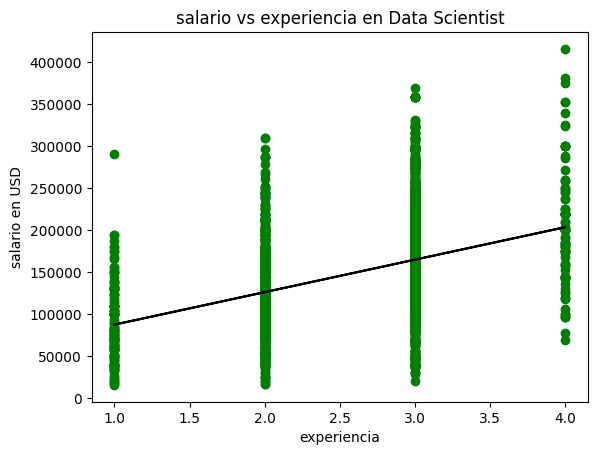

In [56]:
#Visualización de datos de entrenamiento

vista_train= plt
vista_train.scatter(x_train, y_train, color='g')
vista_train.plot(x_train, regresor.predict(x_train), color='black')
vista_train.title('salario vs experiencia en Data Scientist')
vista_train.xlabel('experiencia')
vista_train.ylabel('salario en USD')

Text(0, 0.5, 'salario en USD')

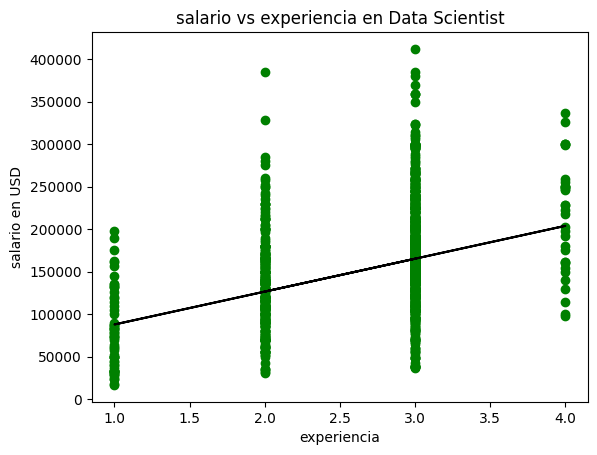

In [57]:
#Visualización de datos de prueba

vista_train= plt
vista_train.scatter(x_test, y_test, color='g')
vista_train.plot(x_test, regresor.predict(x_test), color='black')
vista_train.title('salario vs experiencia en Data Scientist')
vista_train.xlabel('experiencia')
vista_train.ylabel('salario en USD')

In [58]:
#Score del model de entrenamiento
regresor.score(x_train,y_train)

0.1483719334137651

In [59]:
#Score del model de prueba
regresor.score(x_test,y_test)

0.16660274993137525

In [65]:
#Input para ingresar Nivel de experiencia para Data Scientist
# donde 'EN'(junior)=1 / 'MI'(midlevel)=2 / 'SE'(senior)=3 / 'EX'(experto)=4
level_exp=int(input('Ingresa que nivel de experiencia que tienes donde "EN"(junior)=1 / "MI"(midlevel)=2 / "SE"(senior)=3 / "EX"(experto)=4'))

# Convertir la entrada a DataFrame con el nombre de columna correcto
level_exp_df = pd.DataFrame([[level_exp]], columns=['experience_level'])

# Predicción del salario que debería ganar de acuerdo al nivel de experiencia que posee como Data Scientist 
user_salary = regresor.predict(level_exp_df)
print(f'El salario estimado para un Data Scientist con nivel de experiencia {level_exp} es: {user_salary[0].round(2)} USD')

El salario estimado para un Data Scientist con nivel de experiencia 3 es: 165160.14 USD
